In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

In [2]:
##使用linalg求逆,使用dot内积
x_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [3]:
#查看公式结果
theta_best

array([[4.06772554],
       [2.89619053]])

In [4]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.06772554],
       [9.86010661]])

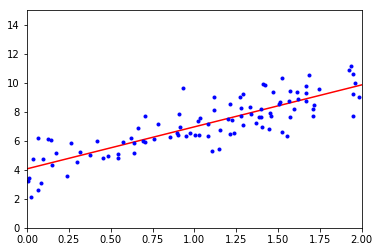

In [5]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.show()

In [7]:
##以上公式等效如下方法
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_


(array([4.06772554]), array([[2.89619053]]))

In [8]:
lin_reg.predict(X_new)

array([[4.06772554],
       [9.86010661]])

In [9]:
##梯度下降算法快速实现
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in  range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta)- y)
    theta = theta - eta * gradients
    
theta

array([[4.06772554],
       [2.89619053]])

In [11]:
## 随机梯度下降

n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta*gradients

In [12]:
theta

array([[4.06304175],
       [2.8542511 ]])

In [14]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())


C:\Users\mj\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [15]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.06214323]), array([2.8738795]))

In [16]:
## 多项式回归
# 用线性模型拟合非线性数据,简单方法是将每个特征的幂次方添加为一个新特征,然后再这个拓展过的特征集上训练线性模型.
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

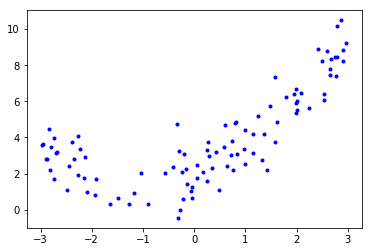

In [18]:
plt.plot(X, y, 'b.')
plt.show()

In [21]:
#利用ploynomialFeatures对训练数据进行转换,将每个特征的平方(二次多项式)作为新特征加入到训练集
from sklearn.preprocessing import PolynomialFeatures
ploy_feature = PolynomialFeatures(degree=2,include_bias=False)
X_ploy = ploy_feature.fit_transform(X)
X[0]

array([2.97214678])

In [23]:
X_ploy[0]

array([2.97214678, 8.83365645])

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_ploy,y)
lin_reg.intercept_,lin_reg.coef_

##因此模型预估 y^ = 0.487x^2+1.011x+2.048

(array([2.04872157]), array([[1.01128751, 0.48788591]]))

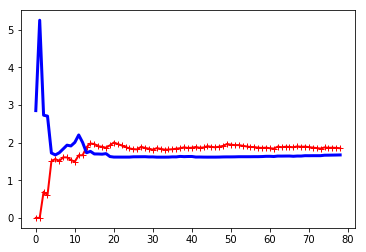

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train')
    plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='val')



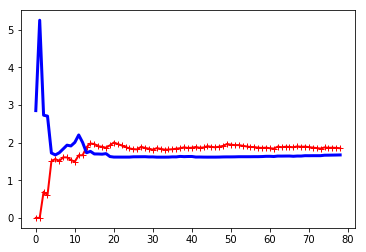

In [45]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

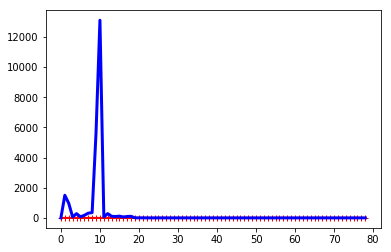

In [48]:
##使用pipeline
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('sgd_reg', LinearRegression()),
))

plot_learning_curves(polynomial_regression, X, y)


两个重大的区别
- 训练数据的误差远低于线性回归的模型
- 两条曲线存在差距,说明模型在训练数据上的表现比验证集上的要好很多


In [50]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.16373195]])

In [51]:
#使用随机梯度
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

C:\Users\mj\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([4.40724094])